In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython

import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib as mpl

In [6]:
import Hawkes as hk

para = {"mu":0.1, "alpha":0.5, "beta":10.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('exp').set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

2052
{'beta': 10.33666033282947, 'alpha': 0.4812257447678529, 'mu': 0.10645247676806636}

7.24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
import Hawkes as hk

para = {"mu":0.1, "alpha":[0.25,0.25], "beta":[1.0,20.0]}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

1997
{'beta': array([ 0.9448391 , 17.66044387]), 'alpha': array([0.21389074, 0.26708937]), 'mu': 0.10364827211103662}

12.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
import Hawkes as hk

para = {"mu":0.1, "k":0.5,"p":2.0,"c":1.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('pow').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('pow').set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

1919
{'p': 1.7114724294641388, 'k': 0.31941643637870515, 'c': 0.7433907457286282, 'mu': 0.08599435695796154}

1.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1177
{'mu': array([11.24679345, 14.736006  , 17.10627022, 17.43878762, 13.53224289,
       11.19028435,  7.88965976,  3.45063124,  0.98611372,  1.11202693,
        3.16792704,  7.81780126]), 'alpha': 0.22360978802190984, 'beta': 9.15960242142778}
{'mu': array([ 9.07576218, 19.3106848 , 14.40696153,  3.59039718,  0.18035007,
        9.8079706 ]), 'alpha': 0.20191598349179046, 'beta': 9.618111606715173}
{'mu': array([ 3.5758525 , -0.70039671,  6.99513377, -1.79428094, -0.13720311,
       12.92846082]), 'alpha': 0.19008229946681082, 'beta': 10.294116741343204}


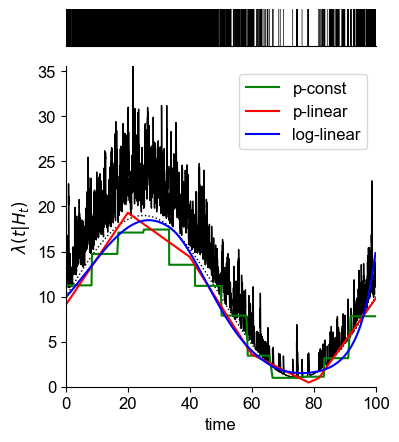

In [14]:
import Hawkes as hk

para = {"alpha":0.2,"beta":10.0}
mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
itv = [0,100]
h1 = hk.simulator().set_kernel("exp").set_baseline('custom',l_custom=mu_t).set_parameter(para)
T = h1.simulate(itv)
print(len(T))

# piecewise constant model
h2 = hk.estimator().set_kernel("exp").set_baseline('pconst',num_basis=12)
h2.fit(T,itv)
print(h2.para)

# piecewise lienar model
h3 = hk.estimator().set_kernel("exp").set_baseline('plinear',num_basis=6)
h3.fit(T,itv)
print(h3.para)

# log-linear model
h4 = hk.estimator().set_kernel("exp").set_baseline('loglinear',num_basis=6)
h4.fit(T,itv)
print(h4.para)

h1.plot_l()
plt.plot(T,h2.baseline.l(T),"g-",label='p-const')
plt.plot(T,h3.baseline.l(T),"r-",label='p-linear')
plt.plot(T,h4.baseline.l(T),"b-",label='log-linear')
plt.legend()

pass

10126


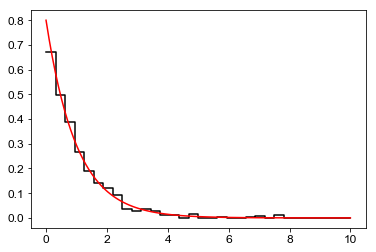

In [18]:
########################## non-parametric model
import Hawkes as hk

para = {"mu":0.2, "alpha":0.8, "beta":1.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

support = 10.0
num_bin = 32

###
h2 = hk.estimator().set_kernel('nonpara',support=support,num_bin=num_bin).set_baseline('const')
h2.fit(T,itv)

h2.kernel.plot()
x = np.linspace(0,support,100)
y = np.exp(-1.0*x)*0.8*1.0
plt.plot(x,y,'r-')